RMS word count is 453
Average word count is 451
Maximum word count is 633
Minimum word count is 305


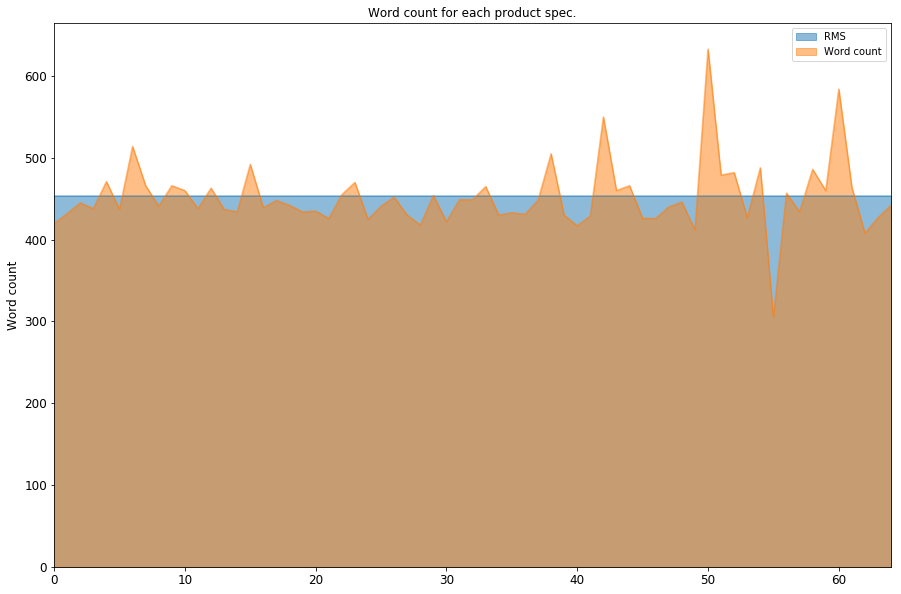

In [1]:
%matplotlib inline

import visuals
import numpy as np
import pandas as pd
from product import Product
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from product_transform import Transform

products = Product().get_all()
"""
Examine the word count for each product specification and detrimine the avarage.
"""
visuals.plot_word_count_graph()

In [2]:
from IPython.display import HTML, display
from tabulate import tabulate

"""
Compare the specs. for the product with the highest and lowest word count.
"""
word_counts = np.array(visuals.get_product_spec_word_counts())

# Get product indices for the product with the lowest word 
# count and the product with the highest word count.
product_max_word_count = products[word_counts.argmax()]
product_min_word_count = products[word_counts.argmin()]

# Build and display the table.
table = [["Product ID", product_max_word_count['id'], product_min_word_count['id']],
         ["Word count", word_counts.max(), word_counts.min()],
         ["Specs.", product_max_word_count['specification'], product_min_word_count['specification']]]


display(HTML(tabulate(table, tablefmt='html')))

Product ID,20656
Word count,305
Specs.,"Manufacturer SpecificationsGeneralOS Version: Android 5.1CPU: S905 Quad Core Cortex-A53GPU: Mali-450MPProcessor Speed (max): 2.0GHzRAM: 2GBInternal Memory: 32GBExternal Memory: Support up to 64GBDisplay Resolution: 4K x 2KSupported Video Resolution: 4K x 2KWi­Fi: 802.11 b/g/nBluetooth 4.0Google PlayKodi 16.0 / XBMCPortsHDMIMicro SD Card Slot: up to 64GB3 x USB PortMRJ45 portAudio RAudio LVideoSPDIFDC INLanguagesBahasa Indonesia, Bahasa Melayu, German, English, Spanish, Filipino, French, Italian, Magyar, Dutch, Portuguese (Brasil), Portuguese (Portugal), Vietnamese, Turkish, Greek, Russian, Hebrew, Arab, Thai, Korean, Chinese (Simp), Chinese(Trad), JapaneseMedia FormatsVideo: AVI, RM, RMVB, TS, MKV, VOB, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEGAudio: MP3, OGG, WMA, AAC, WAV, AC3, DDP, TrueHD, DTS, HD, FLAC, APEGraphic: JPEG, PNG, BMP, GIF, TIFFeBook: PDF, TXTDimensionsMain Product Dimensions: 162x131 x24 mm (L x W x D)Main Product Weight: 370gWeight/dimension is for the main item of this boxed product, to help you compare product sizes before buying: please do not base your shipping calculations on this price ­ shipping prices depend on your cart contents, shipping destination, and shipping method: please use the checkout to select options and preview shipping price for your total order.Product NotesThe Android OS version on this device cannot be upgraded or flashed and any attempts to modify the default OS will void the warranty. As a wholesaler, we provide no software support, advice, or training regarding the Android operating system and software.Package ContentsTV BoxRemote ControlPower AdapterHDMI CableUser ManualEnjoy the following benefits:Orders processed and shipped within 1 Working Day12 month warrantyIn­house QCMember discountsAward winning customer supportQuantity order discountsWorldwide ShippingCertification: CE, FCC, RoHSForeign Language Keywords"


In [3]:
"""
The information under General, Ports and Media Format better describe the attributes of the product.
Let's check if this information is available to all products.
"""


def check_info_exists(key):
    
    missing_count = 0
    for product in products:
        
        """
        Each HTML <ul> tag contains an id i.e <ul id="general"> we 
        loop over each product's spec. to see if the id exists
        within the content.
        """
        soup = bs(product['specification'], 'html.parser')
        tag = soup.find(id=key)
        if not tag or (tag.contents == 0):
            missing_count += 1
    
    if missing_count > 0:
        print('{} info could not be found for {} product(s)'.format(key, missing_count))
    else:
        print('All products have %s spec.' % key)

        
check_info_exists('general')
check_info_exists('Ports')
check_info_exists('Media_Formats')

All products have general spec.
All products have Ports spec.
All products have Media_Formats spec.


RMS word count is 109
Average word count is 108
Maximum word count is 148
Minimum word count is 70


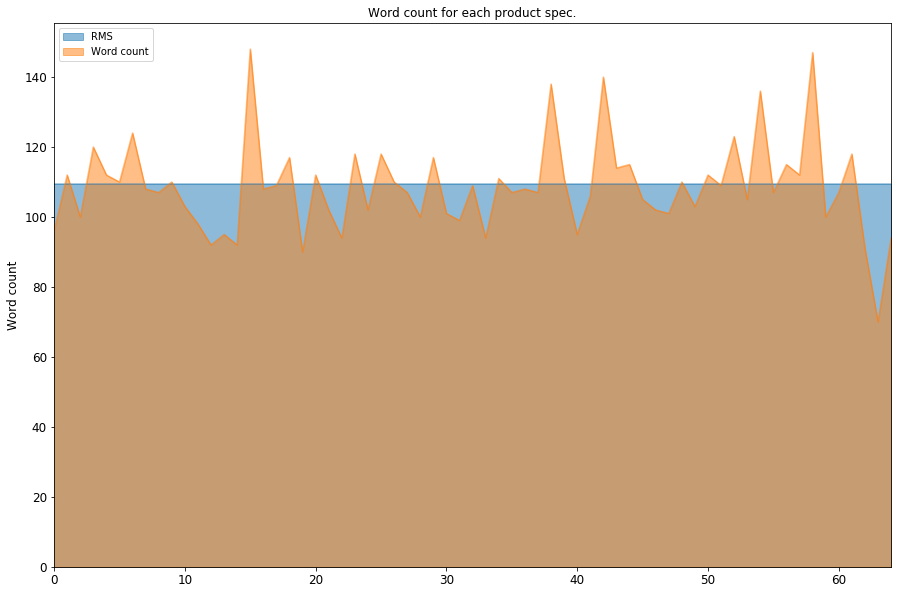

In [4]:
"""
Now we have confirmed that each product spec. contains the required info. 
let's re-examine our word counts for only this data.
"""
visuals.plot_word_count_graph(refine_spec=True)

In [5]:
from pprint import pprint

"""
List the related item ids that have been manually selected for the first product.
"""
print('Related items for product id {}:'.format(products[0]['id']))
pprint(products[0]['related'])

Related items for product id 20673:
[{'product_id': 19830},
 {'product_id': 20242},
 {'product_id': 20654},
 {'product_id': 20846},
 {'product_id': 20964},
 {'product_id': 20965},
 {'product_id': 21092},
 {'product_id': 21098},
 {'product_id': 21104},
 {'product_id': 21492}]


In [20]:
from engine import Engine, matching_score
"""
Display a table of the parent product's refined spec. 
againest two related items refined spec..
"""

parent = products[0]
item_1 = Product().find_by_id(19830)
item_2 = Product().find_by_id(20242)

# Build and display the table
table = [
    ['Product ID', parent['id'], item_1['id'], item_2['id']],
    ['Product name', parent['short_name'], item_1['short_name'], item_2['short_name']],
    ['Spec.', 
     Transform(parent).get('specification').refined().text(),
     Transform(item_1).get('specification').refined().text(),
     Transform(item_2).get('specification').refined().text()]
]

display(HTML(tabulate(table, tablefmt='html')))


Product ID,20673,19830,20242
Product name,V88 Android TV Box,F7 Android TV Box,MXQ Android TV Box
Spec.,"OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG","OS Version: Android 4.4 CPU: Rock Chip 3218 Quad-Core Processor Speed (max): 1.2GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 32GB Display Resolution(max): 1920x1080 Wi-Fi: 802.11 b/g/n Bluetooth DLNA Miracast Airplay Google Play Supported XBMC, Kodi AV Out Mini HDMI LAN OTG SPDIF DC IN Micro SD Card Slot 2x USB Video: MP4, 3GP, AVI Audio: MP3, WMA, WAV Graphic: JPG, GIF, PNG, BMP eBook: PDF, TXT","OS Version: Android 4.4 CPU: Amlogic S805 Quad-Core Cortex-A5 GPU: Quad-Core Mali-45 Processor Speed (max): 1.6GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 32GB Display Resolution(max):1920x1080 Support Video Resolution(max): 4K x 2K Wi-Fi: 802.11 b/g/n Google Play DLNA Miracast Airplay Kodi / XBMC 16.0 HDMI 4x USB SPDIF SD card slots AV port RJ45 port DC IN Video: AVI, RM, RMVB, Ts, VOB, MKV, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEG Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS, DTS, HD, FLAC, APE Graphic: HD JPEG, BMP, GIF, PNG, TIFF eBook: PDF, TXT"


Text parsed in 0.0061473846435546875 seconds.
Engine trained in 0.0023381710052490234 seconds.


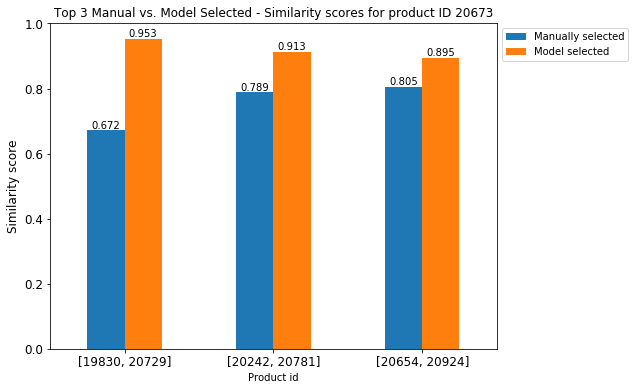

--------------------------------------------------
sparse matrix shape: (65, 115)
nonzero count: 605 out of 7475:
sparsity: 91.91%


,term,weight
89,tv,30.182777
16,box,27.390094
10,android,17.244235
3,4k,6.887078
46,media,5.111881
63,player,4.906306
74,smart,4.584562
14,best,4.272599
41,kodi,3.911404
20,cheap,3.507161


['10', '1080p', '3d', '4k', 'a200', 'accessory', 'airplay', 'am3', 'amlogic', 'andriod', 'android', 'band', 'bar', 'bb2', 'best', 'bluetooth', 'box', 'boxes', 'budget', 'center', 'cheap', 'computer', 'coowell', 'core', 'dual', 'dvb', 'entertainment', 'f7', 'fi', 'google', 'h96', 'hd', 'hdmi', 'home', 'hub', 'internet', 'k1', 'k3', 'kb2', 'km5', 'km8', 'kodi', 'ks1', 'm8spro', 'mecool', 'medi', 'media', 'meegopad', 'micro', 'mini', 'minix', 'multimedia', 'mx', 'mx3', 'mx3tv', 'mx9', 'mxiii', 'mxq', 'neo', 'octa', 'ott', 'pc', 'pip', 'player', 'plus', 'premium', 'pro', 'quad', 'r99', 'recording', 's2', 's905', 's912', 'scishion', 'smart', 'sound', 'soundbar', 'star', 'stick', 'sunvell', 't09', 't2', 't95max', 't95n', 't95p', 't95u', 't95v', 't95z', 'television', 'tv', 'u1', 'u9', 'ugoos', 'uhd', 'ultra', 'ut6', 'v88', 'v99', 'wholesale', 'wi', 'windows', 'wireless', 'x7', 'x8', 'x9', 'x92', 'x95', 'x96', 'x98', 'x9s', 'xbmc', 'yoka', 'yokatv', 'z4', 'zidoo']


In [34]:
"""
Train engine using meta keywords and plot graph.
This will be used as the benchmark model.
"""
engine = Engine()
tf = engine.train_on('meta_keyword')

visuals.plot_product_scores(20673, engine, show_values=True)
    
print('-' * 50)    
table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf)
display(table)


print(tf.get_feature_names())

Text parsed in 0.039664506912231445 seconds.
Engine trained in 0.018874645233154297 seconds.


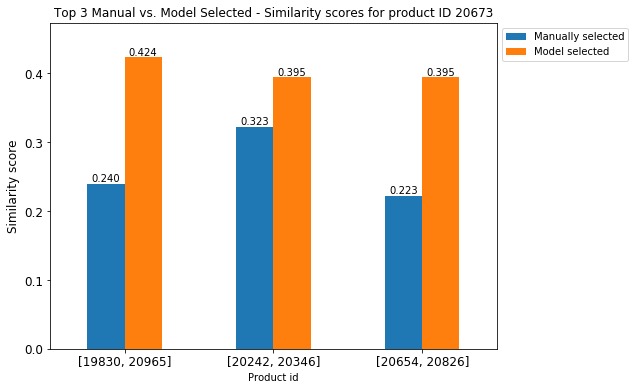

--------------------------------------------------
sparse matrix shape: (65, 1651)
nonzero count: 9826 out of 107315:
sparsity: 90.84%


,term,weight
1499,tv,16.874903
207,box,11.701680
127,android,8.449768
53,4k,5.582177
892,media,4.296428
940,movies,3.921294
603,games,3.853815
465,enjoy,3.557735
808,latest,3.391699
285,comes,2.973409


In [35]:
"""
Train engine using overview and plot graph.
"""
tf = engine.train_on('overview')

visuals.plot_product_scores(20673,engine, show_values=True)
    
print('-' * 50)    
table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf)
display(table)

Text parsed in 0.13994669914245605 seconds.
Engine trained in 0.020083904266357422 seconds.


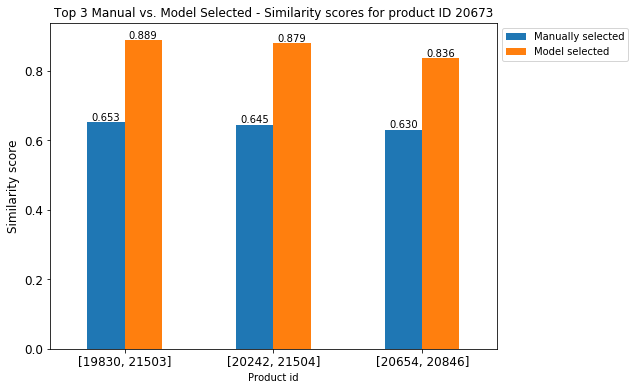

--------------------------------------------------
sparse matrix shape: (65, 956)
nonzero count: 15898 out of 62140:
sparsity: 74.42%


,term,weight
763,tv,23.137999
285,android,20.016313
322,box,14.443347
199,4k,13.612918
713,shipping,9.593065
646,product,7.994221
738,support,5.529347
608,os,4.808566
531,main,4.796533
351,chinese,4.745511


In [36]:
"""
Train engine using specification and plot graph.
"""
tf = engine.train_on('specification')
visuals.plot_product_scores(20673, engine, show_values=True)
    
print('-' * 50)    
table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf)
display(table)

Text parsed in 0.25002336502075195 seconds.
Engine trained in 0.00667881965637207 seconds.


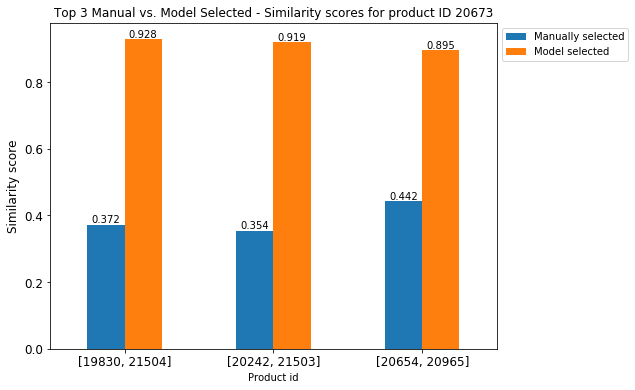

--------------------------------------------------
sparse matrix shape: (65, 359)
nonzero count: 6003 out of 23335:
sparsity: 74.27%


,term,weight
56,4k,7.618972
340,video,7.585183
207,memory,7.484330
276,resolution,7.294448
27,2k,6.858354
171,hd,6.592638
36,32gb,6.200308
284,rm,5.403177
310,support,5.321627
142,dts,5.097598


In [37]:
"""
Train engine using refined specification and plot graph.
"""
tf = engine.train_on('refined_specification')

visuals.plot_product_scores(20673, engine, show_values=True)

print('-'*50)
table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf)
display(table)

Text parsed in 0.27973318099975586 seconds.
Engine trained in 0.0066378116607666016 seconds.


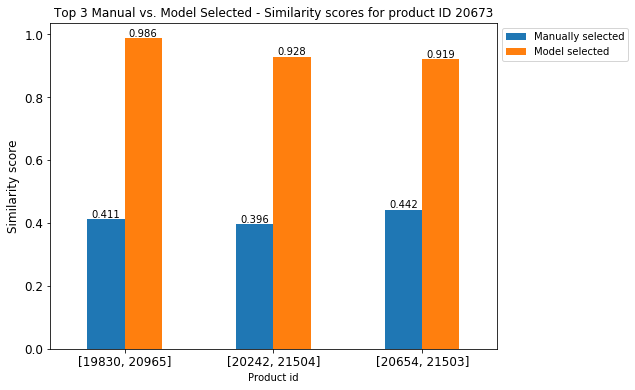

In [38]:
"""
Remove words that don't apper in at least two product refined specs.
Plot scores for 3 differnet porducts.
"""
tf = engine.train_on('refined_specification', min_df=2)
visuals.plot_product_scores(20673, engine, show_values=True)

# ids = [20673, 21492, 20964]
# for i in ids:
#     visuals.plot_product_scores(i, engine, show_values=True)

In [31]:
parent = Product().find_by_id(20673)
item_1 = Product().find_by_id(20965)
item_2 = Product().find_by_id(21504)

# Build and display the table
table = [
    ['Product ID', parent['id'], item_1['id'], item_2['id']],
    ['Product name', parent['short_name'], item_1['short_name'], item_2['short_name']],
    ['Spec.', 
     Transform(parent).get('specification').refined().text(),
     Transform(item_1).get('specification').refined().text(),
     Transform(item_2).get('specification').refined().text()],
]

display(HTML(tabulate(table, tablefmt='html')))

Product ID,20673,20965,21504
Product name,V88 Android TV Box,SCISHION V88 Plus Android TV Box,4K Android TV Box T96R
Spec.,"OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG","OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 2GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support E home media center HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG","OS Version: Android 5.1 CPU: Rock chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 2GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 b/g/n Bluetooth Google Play DLNA Kodi 16.1/ XBMC 3D movie Support HDMI 2.0 Micro SD Card Slot: up to 16GB RJ45 port SPDIF AV out 3xUSB DC IN Video: MKV, WMV, VC, SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO , MP4, RM, H.264,H.265, realVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG"


In [26]:
table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf, n_top=10)
display(table)

print(tf.stop_words_)
print('-'*50)
print("Total of %d features:" % len(tf.get_feature_names()))
print(tf.get_feature_names())

sparse matrix shape: (65, 240)
nonzero count: 5884 out of 15600:
sparsity: 62.28%


,term,weight
229,video,8.013830
38,4k,7.995391
140,memory,7.862221
190,resolution,7.660794
20,2k,7.130491
118,hd,6.925017
24,32gb,6.455461
210,support,5.642847
193,rm,5.610182
99,dts,5.324897


{'1608mhz', 'uhd', 'vcd', 'ddr3', 'hexa', 'x5', 'power', 'trail', '44ghz', 'rk3229', 'a5', 'a7', 'm4a', 'webm', '8g', 'high', 'rk3188', 'rv', 'true', 'v17', 'aarm', 'adapter', '12eu', 'ui', 'specification', 'ra', 'sata3', 'mp1', 't860', 'led', 'air', 'multi', 'v4', 'device', 'performance', 'real', '3368', 's802', 'channels', '128gb', 'rj045', 'source', 'v15', 'peg', 'intel', 'picture', 'xusb', 'option', 'windows', 'isdb', 'rf', 'sata', 'original', 'dtmb', 'cherry', '32', 'powervr', 'gen8lp', 'line', '30fps', 'center', 'atsc', 'format', 'custom', 'keyboard', '30mbps', '2160', 'wireless', 'rtd1295dd', '15', 'oga', 'coax', 'hardware', 'pdif', 'z8300', '60hz', 'ecology', 'hdd', 'mail', '14', 'flash', '50', 's2', '3840', 'a72', 'adobe', '3218', 'frequency', '30hz', 's805', '905', '45', 'rk3399', 'vmw', 'media', 'mrj45', 'mso9180d1r', '3gpp', 'dvd', '800mhz', '252mhz', 'lch', 'atom', 'mbps', 't2', 'dvb', 'mini', '8tb', 'home', '5mm', '4a', 'ota', 'codec', 'unlicensed', 'file', 'vp6', 'files'

In [40]:
"""
Sanatiy chech benchmark vs solution model.
"""
parent = Product().find_by_id(20673)
item_1 = Product().find_by_id(20729)
item_2 = Product().find_by_id(20965)

# Build and display the table
table = [
    ['Product ID', parent['id'], item_1['id'], item_2['id']],
    ['Product name', parent['short_name'], item_1['short_name'], item_2['short_name']],
    ['Spec.', 
     Transform(parent).get('specification').refined().text(),
     Transform(item_1).get('specification').refined().text(),
     Transform(item_2).get('specification').refined().text()],
]

display(HTML(tabulate(table, tablefmt='html')))

Product ID,20673,20729,20965
Product name,V88 Android TV Box,T95X TV Box,SCISHION V88 Plus Android TV Box
Spec.,"OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG","OS Version: Android 6.0 CPU: S905X quad-core cortex-A53 GPU: Mali-450MP Processor Speed (max): 2.0GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 b/g/n Google Play Kodi 16.0 / XBMC DC IN RJ45 port AV Out 2xUSB Micro SD Card Slots: up to 32 GB Video: AVI, RM/RMVB, TS, MKV, VOB, ISO, VMW, ASF, FLV, DAT, MPG, MPEG, Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS HD, FLAC, AP Graphic: JPEG, PNG, BMP, GIF, TIFF eBook: PDF, TXT","OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 2GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support E home media center HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG"


Text parsed in 0.2508656978607178 seconds.
Engine trained in 0.019689321517944336 seconds.


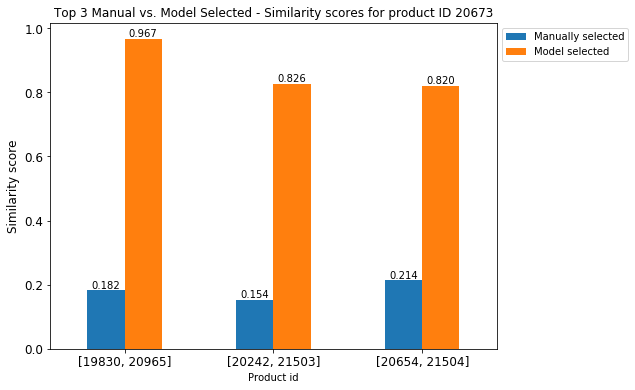

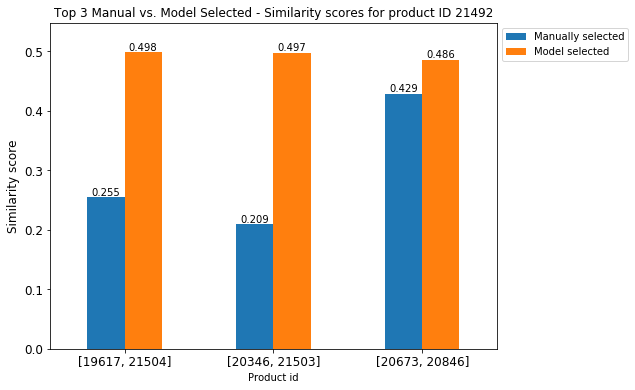

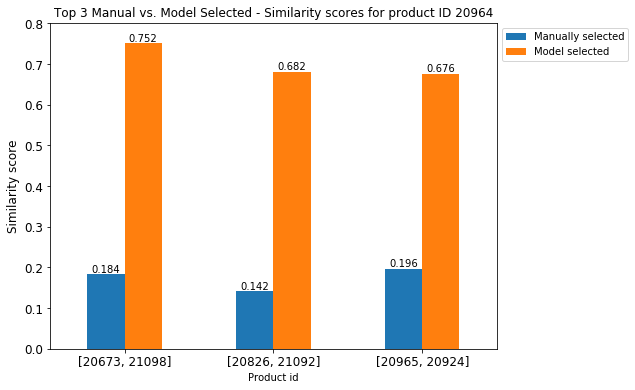

Vocabulary size: 1421
sparse matrix shape: (65, 1421)
nonzero count: 17449 out of 92365:
sparsity: 81.11%


,term,weight
1337,video,3.750607
192,4k,3.734860
824,memory,3.654942
1100,resolution,3.564142
1101,resolution 4k,3.435856
672,hd,3.316945
196,4k 2k,3.294284
99,2k,3.294284
1104,resolution 4k 2k,3.258425
128,32gb,3.029817


{'11 bluetooth support', '60fps support video', 'remote control android', 'band wifi', 'v2 google', '4k wi', 'usb spdif hdmi', '3368 octa core', 'ac 4ghz', 'custom ui specification', '264 real', '1080p 3d', 'ac 4g', 'supported airplay', 'micro hdmi', 'rmvb mpeg wmv', 'unlicensed windows 10', 'max 1080p support', 'mpg flv', '450 600mhz processor', 'hdmi 4a channels', 'device', 'spdif 3x usb', '11 bluetooth kodi', 'v15', 'airplay supported kodi', 'receiver video mkv', 't2 dvb s2', 'lan dc otg', 'supported miracast supported', '10 avi ts', 'audio port', '32gb supported video', 'otg dc', '2k 30fps', 'mkv ts rm', 'bluetooth support dlna', '0ghz ram 3gb', '0v hdmi', 'dc hdmi rj45', '3d movie infra', '263 264 avs', 'play adobe', 'flash video', 'usb dc', 'arm a53 gpu', 'slots av', 'channel wi', '15', '4k 30hz', '12eu gen8lp 600mhz', 'mail', 'rk3399 hexa', 'airplay kodi hdmi', 'av mini', '3840', 'fi 4ghz 5ghz', 'vc mpeg2 mp', '2gb ddr3 internal', 'mkv ts', 'vob dvd', 'wav ape flac', 'graphic gp

In [33]:
"""
Remove words that don't apper in at least two product refined specs.
Use bi-gram words instead i.e ['android 5.1'] instead if single words ['android' '5.1'].
Plot scores for 3 differnet porducts.
"""

tf = engine.train_on('refined_specification', min_df=2, ngram_range=(1,3))

ids = [20673, 21492, 20964]
for i in ids:
    visuals.plot_product_scores(i, engine=engine, show_values=True)
    
print('Vocabulary size: %d' % len(tf.vocabulary_))

table = visuals.show_top_weighted_terms(engine.tfidf_matrix, vector=tf, n_top=10)
display(table)

print(tf.stop_words_)
# print(tf.get_feature_names())

Text parsed in 0.24906563758850098 seconds.
Engine trained in 0.00676274299621582 seconds.


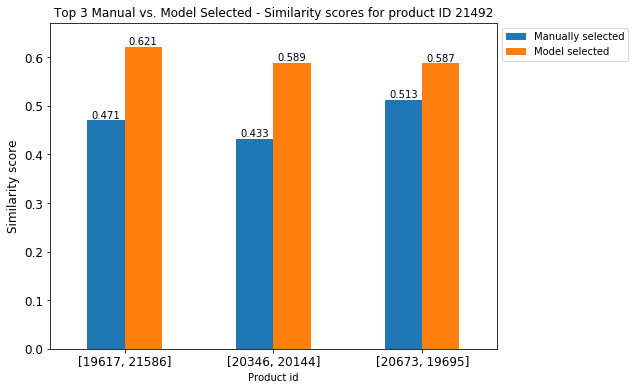

Product ID,21492,21586,19617
Product name,SCISHION V99 Star TV Box,4K Android TV Box COOWELL V11,MX3 4K Android TV Box
Spec.,"OS Version: Android 5.1 CPU: Rockchip 3368 Octa-Core GPU: PowerVR Processor Speed (max): 1.5GHz RAM: 2GB Internal Memory: 16GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K WIFI: 802.11 b/g/n/ac, Dual Band (2.4GHz + 5GHz) Bluetooth Google Play DLNA Kodi / XBMC HDMI Micro SD Card Slot: up to 32GB 2x USB RJ45 Optical DC IN Video: MKV, WMV/VC-1 SP/ MP/ AP, MPG, MPEG, DAT, AVI, MOV, ISO, mp4, RM, H.264, real Video 8/9/10, up to 1080P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG eBook: PDF, TXT","OS Version: Android 5.1 CPU: Rockchip 3229 Quad-Core GPU: Mali-400 Processor Speed (max): 1.5GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 a/b/g/n Google Play Miracast Kodi 16.0v/ XBMC HDMI Micro SD Card Slot: up to 32GB RJ45 AV 2x USB Video: MKV, WMV, VC, SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO , MP4, RM, H.264,H.265, realVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPEG, PNG, BMP, GIF","OS Version: Android 4.4 CPU: Amlogic S802 Quad Core GPU: Octa Core ARM Mali-450 up to 600MHz Processor Speed (max): 2.0GHz RAM: 2GB Internal Memory: 8GB External Memory: Support up to 32GB Wi-Fi: 802.11 b/g/n (2.4G/ 5G) Display Resolution(max): 4K x 2K/30fps, 1080P/60fps Support Video Resolution(max): 4K x 2K Bluetooth DLNA, Miracast Google Play XBMC Original ecology and custom UI specification HDMI OUT Micro SD Card Slot 2x USB SPDIF AV LAN DC IN OTG Video: H.264, 4Kx2K, H.264, MPEG-4/2/1, WMV Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, GIF E-Book: PDF, TXT"


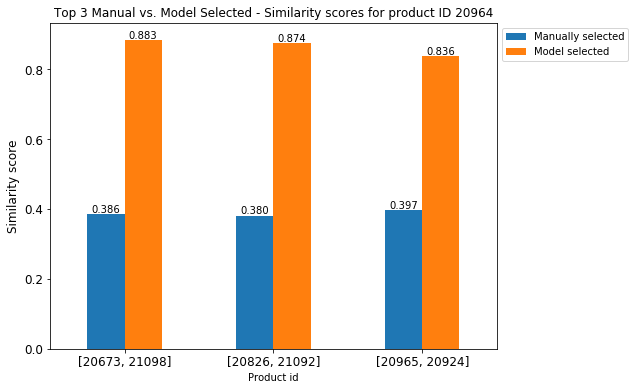

Product ID,20964,21098,20673
Product name,SCISHION V99 TV Box,4K TV Box,V88 Android TV Box
Spec.,"OS Version: Android 6.0 CPU: Amlogic S912 GPU: ARM Mali-T820MP3 Processor Speed (max): 2.0GHz RAM: 2GB Internal Memory: 16GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Bluetooth 4.0 Google Play XBMC /Kodi: V16.1 DLNA Miracast Airplay HDMI RJ45 port Micro SD Card Slot: up to 32GB 3xUSB Port SPDIF DC IN Video: HD MPEG1/2/4, H.265,4K-HD, HD AVC/VC-1, RM/RMVB, Xvid/DivX3/4/5/6, RealVideo8/9/10, AVI, RM, RMVB, TS, VOB, MKV, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEG Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS, DTS, HD, FLAC, APE Graphic: JPEG, BMP, GIF, PNG, TIFF","OS Version: Android 6.0 CPU: Amlogic S912 GPU: ARM Mali-T820MP3 Processor Speed (max): 1.5GHz RAM: 2GB Internal Memory: 16GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 b/g/n, Dual Band (2.4GHz/5GHz) Bluetooth Google Play Kodi V16.1 / XBMC HDMI Micro SD Card Slot: up to 32GB 2xUSB SPDIF AV out RJ45 port DC IN Video: HD MPEG1/2/4, H.265,4K-HD, HD AVC/VC-1, RM/RMVB, Xvid/DivX3/4/5/6, RealVideo8/9/10, AVI, RM, RMVB, TS, VOB, MKV, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEG Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS, DTS, HD, FLAC, APE Graphic: JPEG, BMP, GIF, PNG, TIFF","OS Version: Android 5.1 CPU: Rock Chip 3229 Quad-Core GPU: Mali-400MP Processor Speed (max): 1.46GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 16GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Google Play Kodi 16.1 3D Movie Support HDMI RJ45 port AV out Micro SD Card Slot: up to 16GB 4xUSB Port SPDIF DC IN Video: MKV, WMV/VC-1 SP/MP/AP, MPG, MPEG, DAT, AVI, MOV, ISO, MP4, RM, H.264, H.265, RealVideo 8/9/10, VP8/9, up to 2160P Audio: MP3, AAC, WMA, RM, FLAC, OGG Graphic: JPG, JPEG, MJPEG, PNG"


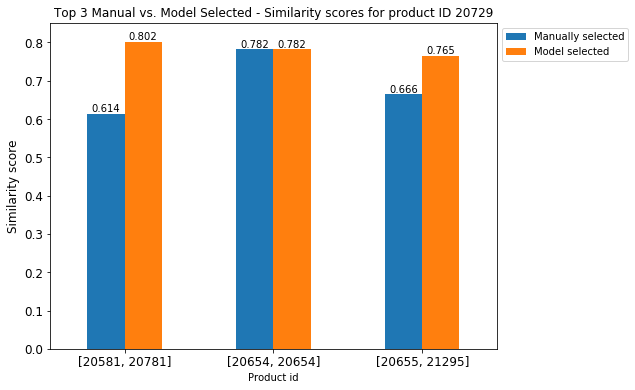

Product ID,20729,20781,20581
Product name,T95X TV Box,KM8 Android 6.0 TV Box,T95m 4K 2GB Android TV Box
Spec.,"OS Version: Android 6.0 CPU: S905X quad-core cortex-A53 GPU: Mali-450MP Processor Speed (max): 2.0GHz RAM: 1GB Internal Memory: 8GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 b/g/n Google Play Kodi 16.0 / XBMC DC IN RJ45 port AV Out 2xUSB Micro SD Card Slots: up to 32 GB Video: AVI, RM/RMVB, TS, MKV, VOB, ISO, VMW, ASF, FLV, DAT, MPG, MPEG, Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS HD, FLAC, AP Graphic: JPEG, PNG, BMP, GIF, TIFF eBook: PDF, TXT","OS Version: Android 6.0 CPU: S905X Quad-Core Cortex-A53 GPU: Mali-450MP Processor Speed (max): 2.0GHz RAM: 2GB Internal Memory: 16GB External Memory: Support up to 32GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi-Fi: 802.11 b/g/n Bluetooth 4.0 Google Play Kodi 17.0/ XBMC DC IN Micro SD Card Slot: Up to 32GB RJ45 port HDMI AV 2xUSB Video: AVI, RM, RMVB, TS, VOB, MKV, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEG Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS ,DTS HD, FLAC, APE Graphic: JPEG, PNG, BMP, GIF, TIFF eBook: PDF, TXT","OS Version: Android 6.0 CPU: S905X Quad-Core Cortex-A9 GPU: Mali-450MP Processor Speed (max): 1.5GHz RAM: 2GB Internal Memory: 8GB External Memory: Support up to 64GB Display Resolution: 4K x 2K Supported Video Resolution: 4K x 2K Wi­Fi: 802.11 b/g/n Bluetooth 4.0 Google Play Kodi 16.0 / XBMC HDMI OUT Micro SD Card Slot: up to 64GB 2 x USB Port AV OUT RJ45 Port SPDIF OTG DC IN Video: AVI, RM, RMVB, Ts, VOB, MKV, MOV, ISO, WMV, ASF, FLV, DAT, MPG, MPEG1/2/4, HD AVC/VC-1, Xvid, DivX3/4/5/6, RealVideo8/9/10 Audio: MP3, WMA, AAC, WAV, OGG, AC3, DDP, TrueHD, DTS, HD, FLAC, APE Graphic: HD JPEG, BMP, GIF, PNG, TIFF"


In [47]:
"""
Confirm solution model works with other datapoints.
"""
tf = engine.train_on('refined_specification', min_df=2)

ids = [21492, 20964, 20729]
for i in ids:
    visuals.plot_product_scores(i, engine, show_values=True)
    scores = engine.get_product_similarity_scores(i)
    
    top_score = scores[0]
    item_score, item_id = top_score
    
    man_item = Product().get_manually_selected_related_items(i)[0]

    parent = Product().find_by_id(i)
    item_1 = Product().find_by_id(item_id)
    item_2 = Product().find_by_id(man_item['product_id'])

    # Build and display the table
    table = [
        ['Product ID', parent['id'], item_1['id'], item_2['id']],
        ['Product name', parent['short_name'], item_1['short_name'], item_2['short_name']],
        ['Spec.', 
         Transform(parent).get('specification').refined().html(),
         Transform(item_1).get('specification').refined().html(),
         Transform(item_2).get('specification').refined().html()],
    ]

    display(HTML(tabulate(table, tablefmt='html')))